## `Ayush Panchal`
## `P24DS013`

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:

url = r'dataset\heart.csv'
data = pd.read_csv(url)


data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [49]:
data.shape

(1025, 14)

In [50]:
data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [52]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [53]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

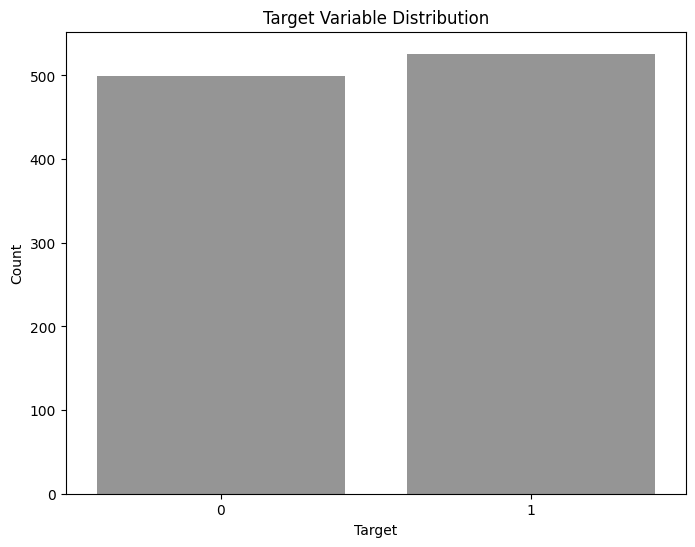

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data, palette='Greys', legend=False , hue=1)
plt.title('Target Variable Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

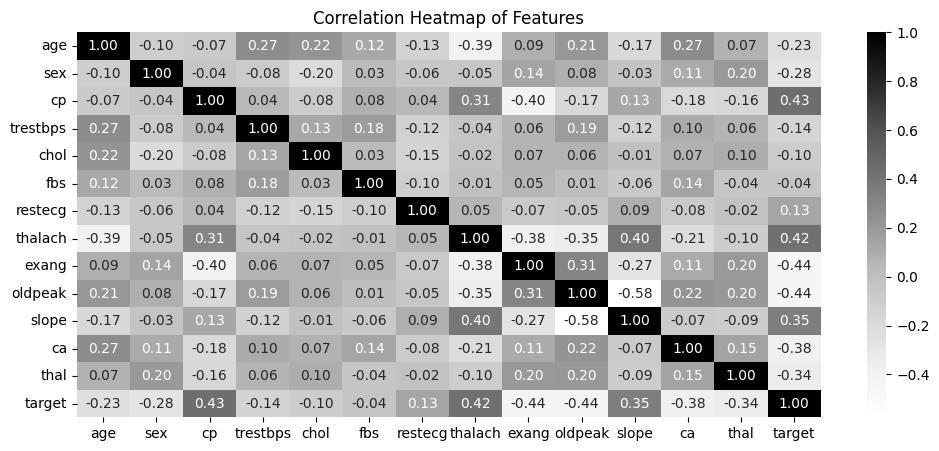

In [55]:

plt.figure(figsize=(12, 5))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Grays', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

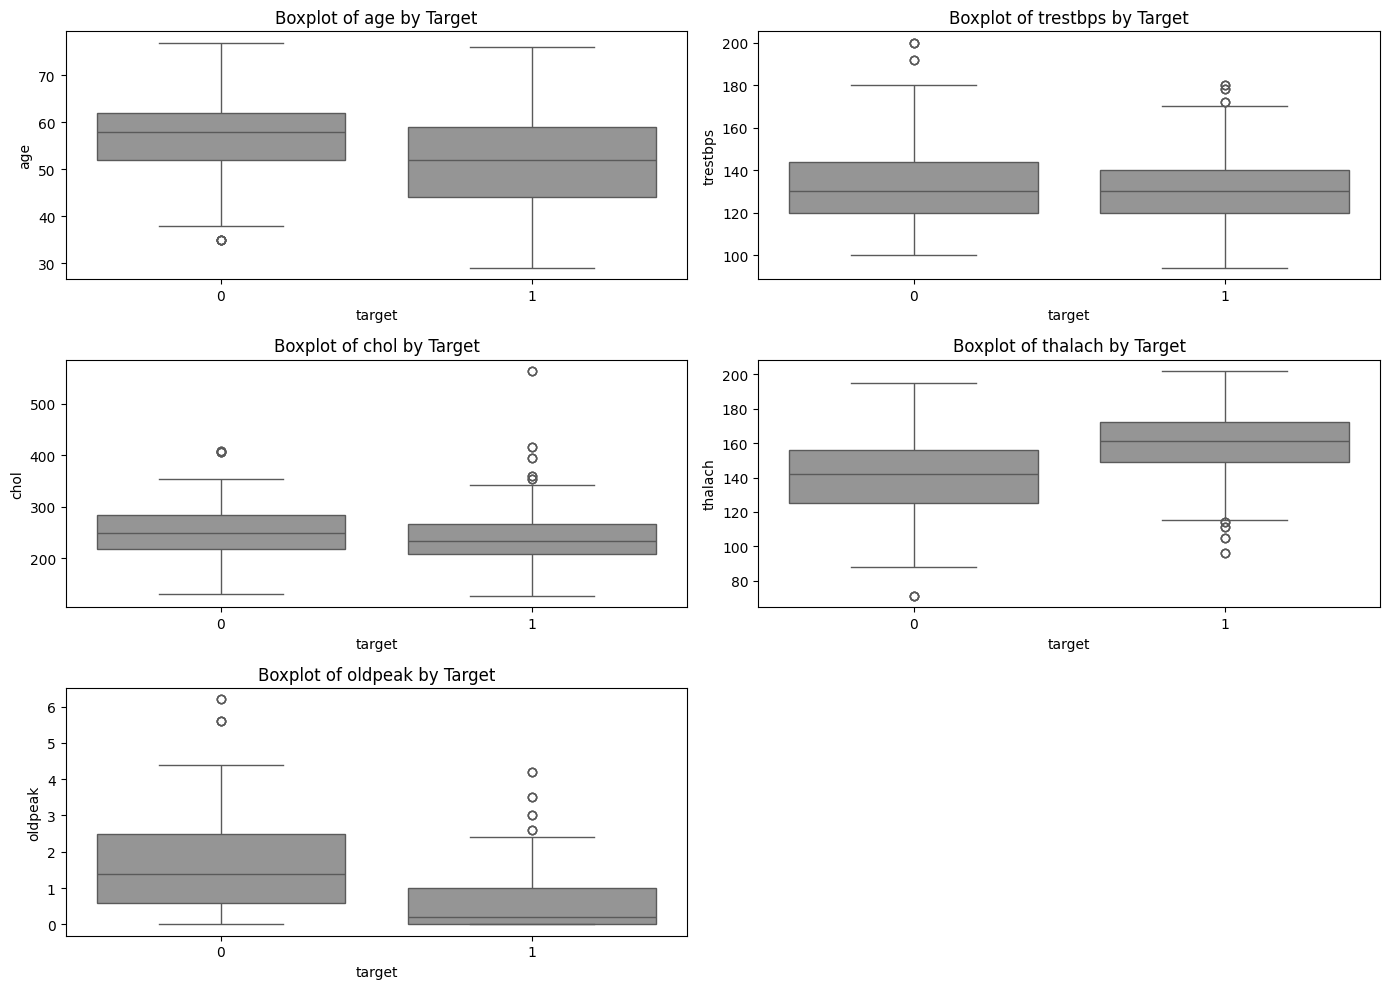

In [56]:

numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='target', y=col, data=data, palette='Greys', hue=1, legend=False)
    plt.title(f'Boxplot of {col} by Target')
plt.tight_layout()
plt.show()

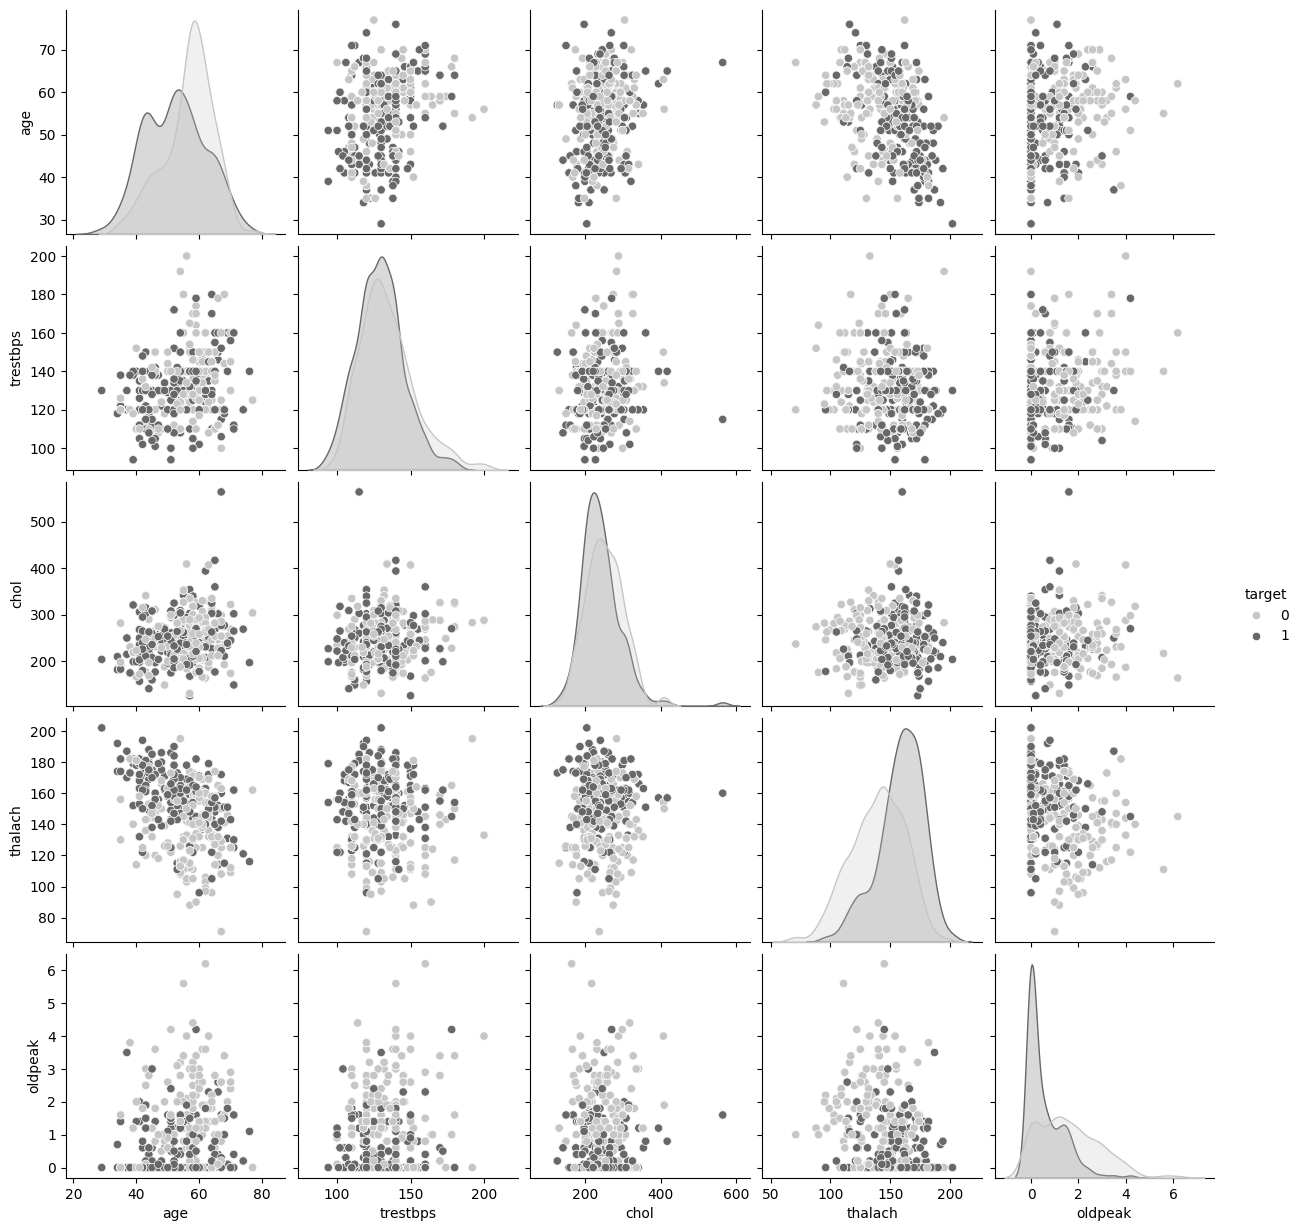

In [57]:

sns.pairplot(data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue='target', palette='Greys')
plt.show()

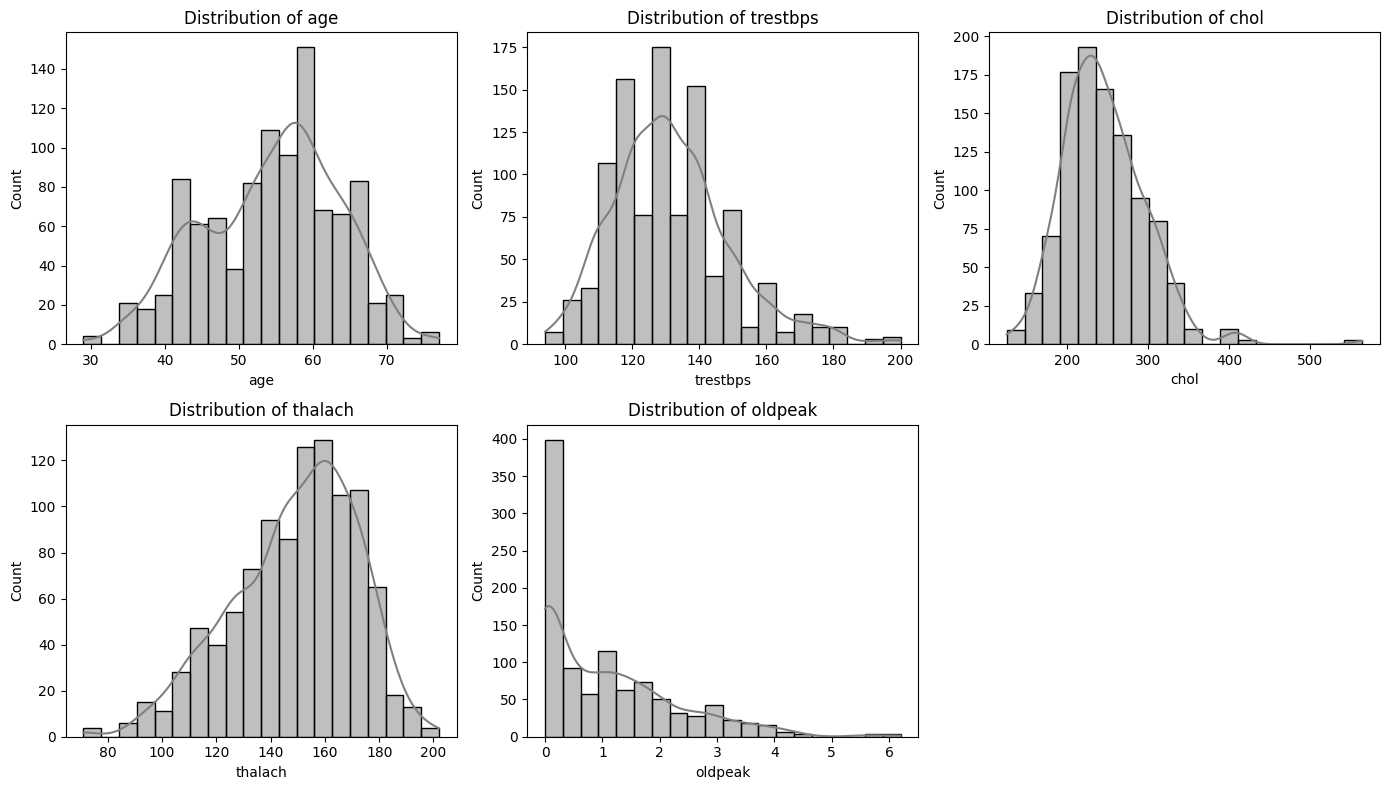

In [58]:

continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(14, 8))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], bins=20, kde=True, color='grey')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [59]:

data = data.dropna()  


X = data.drop('target', axis=1)  
y = data['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [60]:
class KNN:
    def __init__(self, k=3, distance_metric='euclidean', weighted=False):
        self.k = k
        self.distance_metric = distance_metric
        self.weighted = weighted

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        
        distances = self._compute_distances(x)

        
        k_indices = np.argsort(distances)[:self.k]

        if self.weighted:
            weights = 1 / distances[k_indices]
            unique, counts = np.unique(self.y_train.iloc[k_indices], return_counts=True)
            weighted_counts = np.zeros(len(unique))
            for i, label in enumerate(unique):
                weighted_counts[i] = np.sum(weights[self.y_train.iloc[k_indices] == label])
            return unique[np.argmax(weighted_counts)]
        else:
            
            most_common = np.bincount(self.y_train.iloc[k_indices].to_numpy()).argmax()
            return most_common

    def _compute_distances(self, x):
        if self.distance_metric == 'euclidean':
            return np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
        elif self.distance_metric == 'manhattan':
            return np.sum(np.abs(self.X_train - x), axis=1)


In [61]:

k_values = [3, 5, 7, 9, 11]
results = {}

for k in k_values:
    knn = KNN(k=k, distance_metric='euclidean', weighted=False)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, predictions)
    results[k] = accuracy
    print(f'Accuracy for k={k}: {accuracy:.4f}')

Accuracy for k=3: 0.9366
Accuracy for k=5: 0.8341
Accuracy for k=7: 0.8244
Accuracy for k=9: 0.8390
Accuracy for k=11: 0.8244


In [62]:
best_k = max(results, key=results.get)
print(f'Best k: {best_k} with accuracy: {results[best_k]:.4f}')

Best k: 3 with accuracy: 0.9366


In [63]:

final_knn = KNN(k=best_k, distance_metric='euclidean', weighted=False)
final_knn.fit(X_train, y_train)
final_predictions = final_knn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, final_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       102
           1       0.92      0.95      0.94       103

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



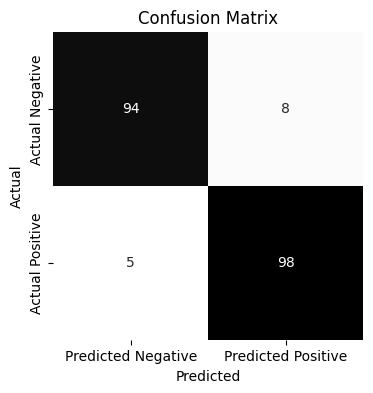

In [64]:

cm = confusion_matrix(y_test, final_predictions)


plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
